# Regression Simulations

Below are some simulations of basic regression techniques. I start with simple regression, demonstrate omitted variable bias, then simulate multiple regression.

### Simple Regression

I'll first take 1000 draws from a distribution representing an x variable, and an error term. 
X will be taken from a normal distribution centered at 5 and a normally distributed error. 

In [1]:
set seed 1
set obs 1000
gen x = 4 + 1.2*rnormal(5)
gen u = 2.7*rnormal()



number of observations (_N) was 0, now 1,000




Now we'll generate a y variable constructed from these draws.

In [2]:
gen y = 2 + 3.8 * x + u

Let's take a look at what these look like. 


(bin=29, start=6.5225029, width=.24784216)


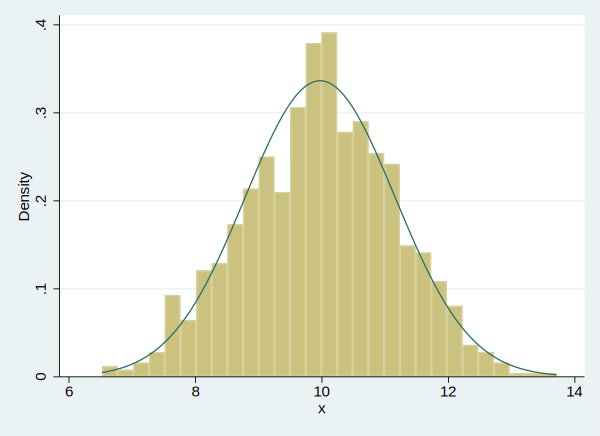



(bin=29, start=-9.0120802, width=.66934385)


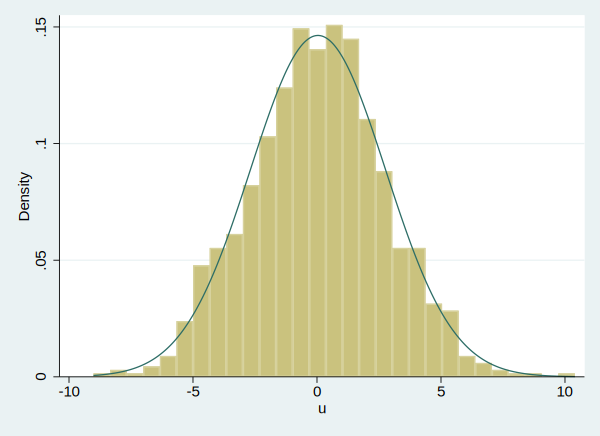



(bin=29, start=24.650557, width=1.1769005)


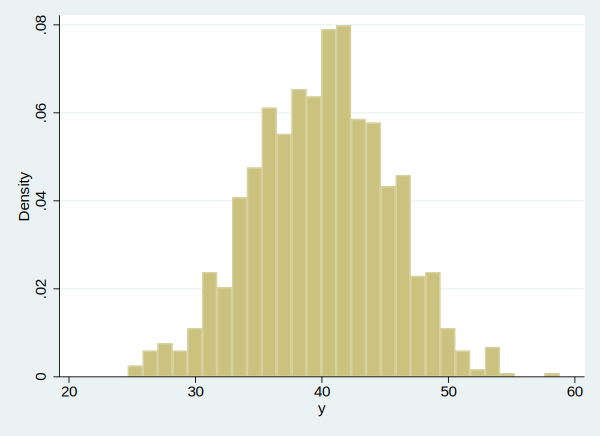

In [3]:
hist x, normal
hist u, normal
hist y

We can see that they're all approximately normal, as intended. Now it we run a regression of x on y, we should get something close to the coefficients as we defined them.

In [4]:
reg y x


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =   2875.73
       Model |  21349.7755         1  21349.7755   Prob > F        =    0.0000
    Residual |  7409.26886       998   7.4241171   R-squared       =    0.7424
-------------+----------------------------------   Adj R-squared   =    0.7421
       Total |  28759.0443       999  28.7878322   Root MSE        =    2.7247

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |   3.899157   .0727104    53.63   0.000     3.756474     4.04184
       _cons |   1.051072    .730145     1.44   0.150    -.3817236    2.483868
------------------------------------------------------------------------------


Pretty close-ish. Rembember we defined the x-coefficient to be 3.8. 

Now what happens if we missed a variable?  I create a z variable drawn from a beta distribution, and a v variable drawn from the normal distribution. How will the ommitted variable bias impact the estimates?

### Multiple Regression

In [27]:
clear 
set seed 1
set obs 1000
gen x = 2*rnormal(5)
gen z = 6 + 4*rbeta(2,4)
gen v = 1 +3.4*rnormal()
gen u = 2.7*rnormal()




number of observations (_N) was 0, now 1,000






again, I generate a y variable from these. 

In [28]:
gen y = 2 + 2*x - 7.1*z + 22*v + u

I use a different distribution for the z variable, let's see how it looks. I plot v below it. 


(bin=29, start=6.0734429, width=.11740949)


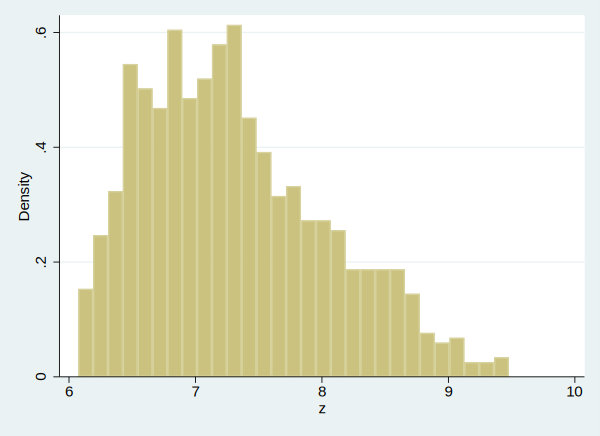

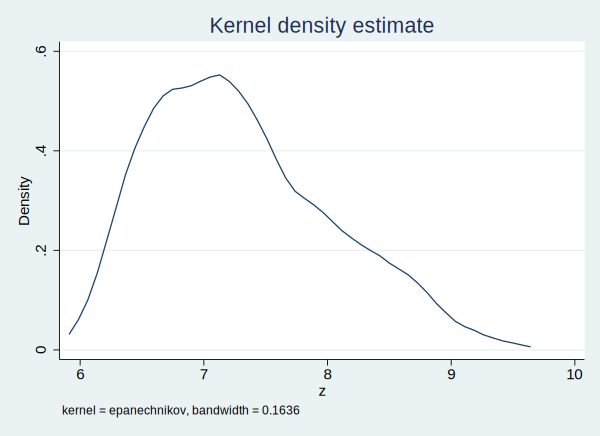





(bin=29, start=-9.7944803, width=.77220601)


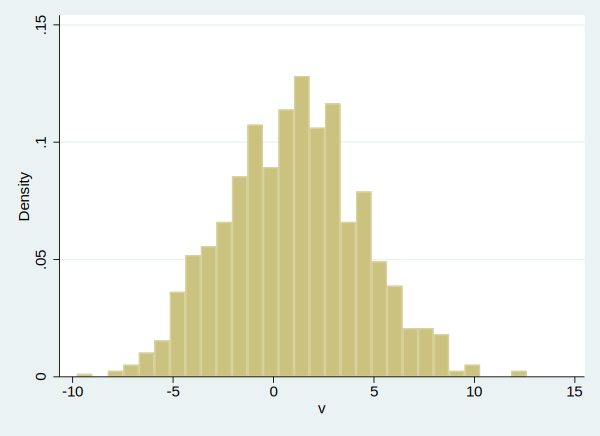

In [29]:
hist z
kdensity z
hist v

Let's run a regression on only x and look at the results.

In [30]:
reg y x


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(1, 998)       =      6.32
       Model |  34670.7112         1  34670.7112   Prob > F        =    0.0121
    Residual |   5474216.8       998  5485.18718   R-squared       =    0.0063
-------------+----------------------------------   Adj R-squared   =    0.0053
       Total |  5508887.51       999  5514.40191   Root MSE        =    74.062

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |   2.981307   1.185826     2.51   0.012     .6543082    5.308306
       _cons |  -38.14537   12.03238    -3.17   0.002    -61.75704   -14.53369
------------------------------------------------------------------------------


We defined the coefficient on x to be 2. Omitting z and v leads to an upwardly biased estimate. In sense, it is falsely attributing the impact of the other two variables to x. Let's add z to the regression.

In [31]:
reg y x z


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(2, 997)       =      3.80
       Model |  41715.9164         2  20857.9582   Prob > F        =    0.0226
    Residual |   5467171.6       997  5483.62246   R-squared       =    0.0076
-------------+----------------------------------   Adj R-squared   =    0.0056
       Total |  5508887.51       999  5514.40191   Root MSE        =    74.051

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |   2.992452   1.185698     2.52   0.012     .6657027    5.319202
           z |  -3.670372   3.238151    -1.13   0.257    -10.02475    2.684001
       _cons |   -11.4233   26.46755    -0.43   0.666    -63.36179    40.51519
--------------------------------------------------

We defined z to be only a small part of the variation. So Adding it doesn't improve things at all. x barely increases in significance, and z appears to not be a statistically significant variable. We might be misled into dropping it.

In [34]:
reg y x v


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(2, 997)       =  78697.14
       Model |  5474211.61         2   2737105.8   Prob > F        =    0.0000
    Residual |  34675.9041       997  34.7802448   R-squared       =    0.9937
-------------+----------------------------------   Adj R-squared   =    0.9937
       Total |  5508887.51       999  5514.40191   Root MSE        =    5.8975

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |   1.998296   .0944587    21.16   0.000     1.812935    2.183656
           v |   21.90879   .0553992   395.47   0.000     21.80008    22.01751
       _cons |  -49.93534   .9585889   -52.09   0.000    -51.81643   -48.05426
--------------------------------------------------

Since v makes up so much of the variation, adding it to the model substantially improves the estimate on x. 

Now with all the variables.

In [35]:
reg y x z v


      Source |       SS           df       MS      Number of obs   =     1,000
-------------+----------------------------------   F(3, 996)       >  99999.00
       Model |  5500946.44         3  1833648.81   Prob > F        =    0.0000
    Residual |  7941.07586       996  7.97296773   R-squared       =    0.9986
-------------+----------------------------------   Adj R-squared   =    0.9986
       Total |  5508887.51       999  5514.40191   Root MSE        =    2.8236

------------------------------------------------------------------------------
           y |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           x |    2.01767    .045227    44.61   0.000     1.928919    2.106421
           z |  -7.154089   .1235451   -57.91   0.000    -7.396527    -6.91165
           v |   21.96116   .0265399   827.48   0.000     21.90908    22.01325
       _cons |   2.121658   1.009362     2.10   0.

and there it is. Since this is the model we defined, R^2 is at .99, and everything is significant. 